## **Lab 5 - Decision Trees**
### S Kailash 18MIS1074 
### SWE4012 Machine Learning (L11+L12)
### Faculty : Dr. M Premlatha
### Date : 22nd February 2022

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from six import StringIO

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#select features
features=['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction'];
x=df[features]
y=df['Outcome']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
#print(y_pred)


In [5]:
confusion_matrix(Y_test, y_pred)
print("Confusion matrix: ",confusion_matrix(Y_test, y_pred))

print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

Confusion matrix:  [[113  33]
 [ 40  45]]
Accuracy: 0.683982683982684


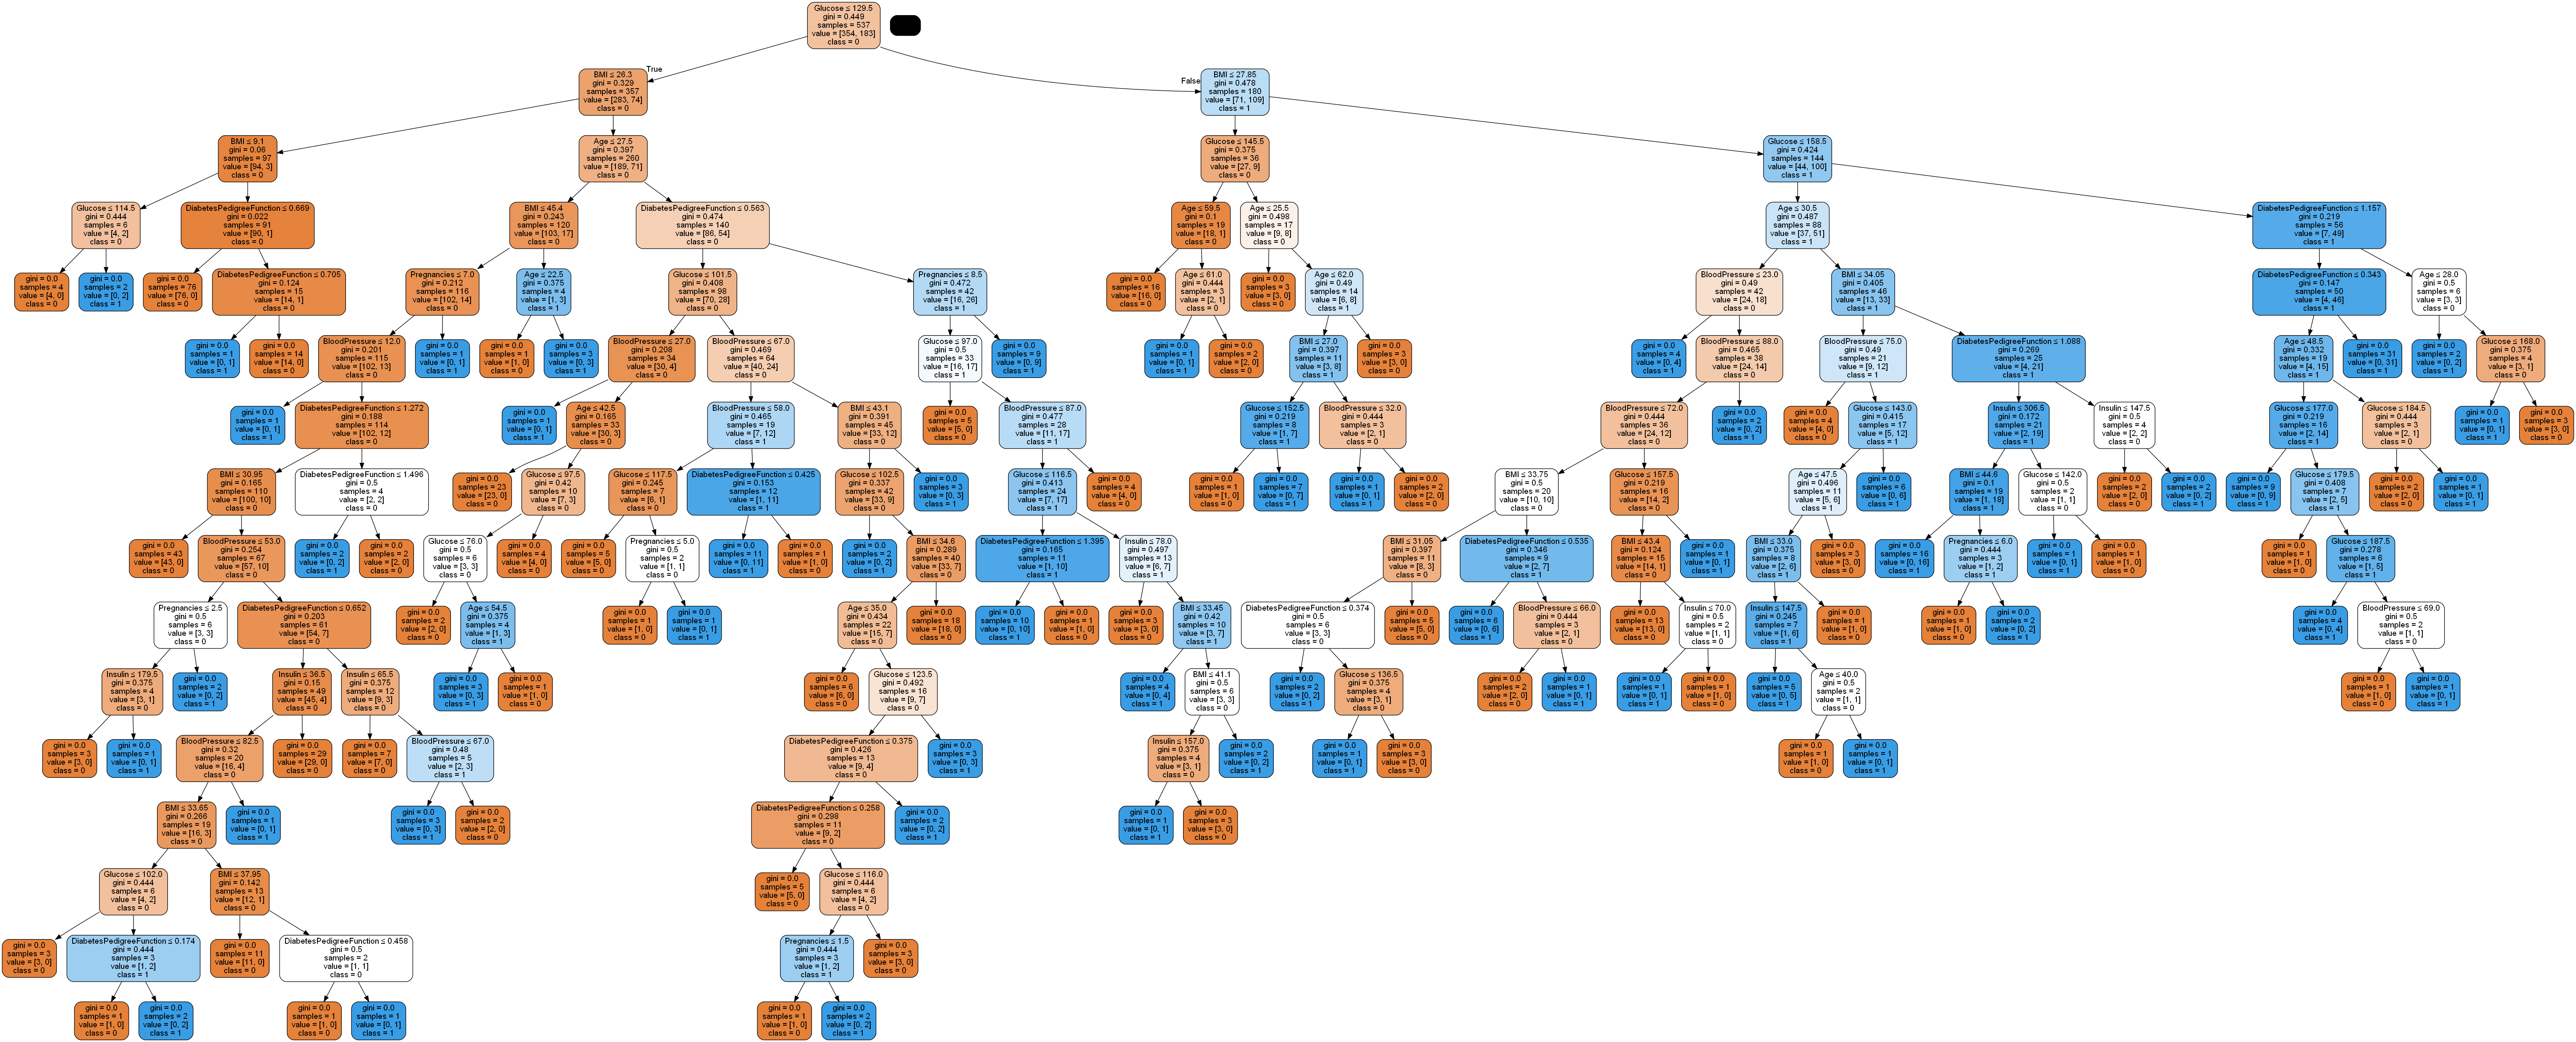

In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features
                ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png(), width=800, height=300)

As we can see, we got an accuracy of ~0.68 for the Diabetes dataset. Let us attempt to build for the next dataset.

In [18]:
#suv dataset
data_red=pd.read_csv('winequality-red.csv',sep=";")
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
#categorise into 2 
#if less than 7 then 0; if greater than 7 then 1
data_red["good_quality"] = [0 if i<7 else 1 for i in data_red["quality"]]
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [35]:
y = data_red["good_quality"]
X = data_red.drop(["good_quality", "quality"], axis=1)
wine_features=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
score = metrics.accuracy_score(y_pred, y_test)
print("Accuracy", score)

Accuracy 0.9075


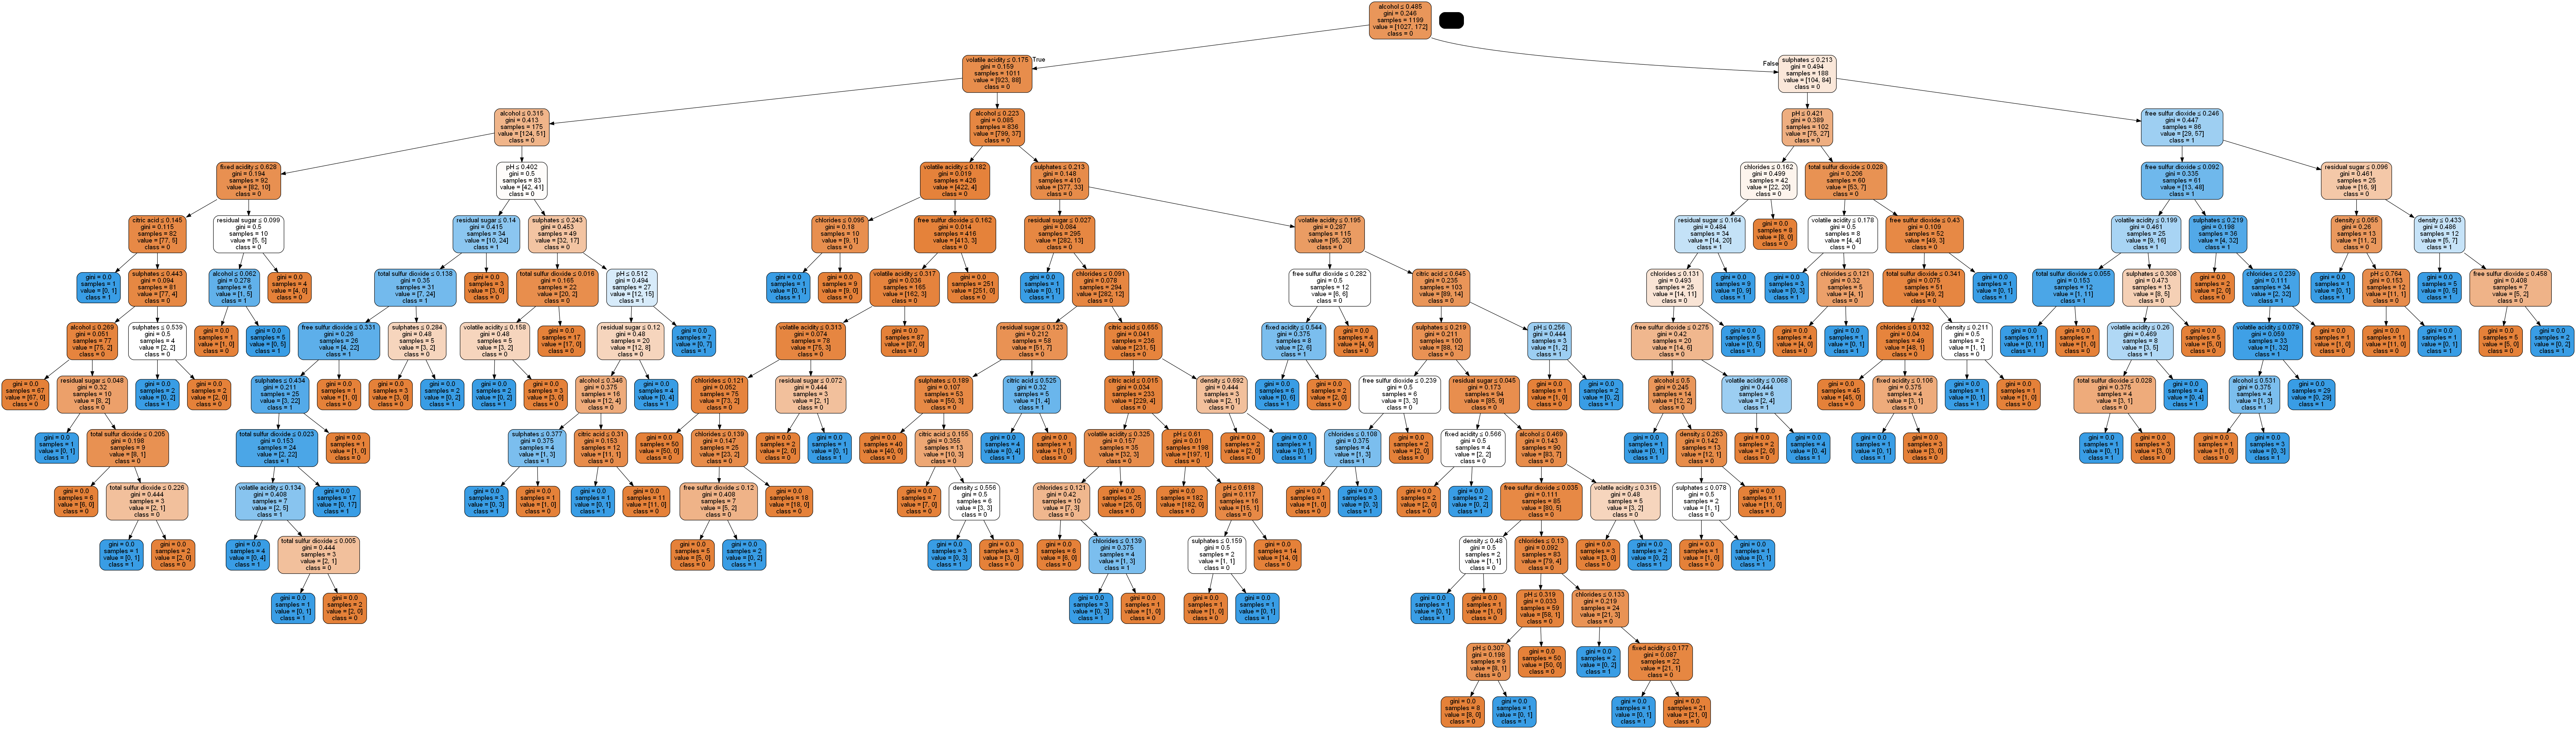

In [36]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = wine_features
                ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png(), width=800, height=300)

### As you can see, the accuracy for the Red Wine dataset is 0.90;<br> We can say that Decision Tree has performed better for Red Wine dataset compared to the Diabetes dataset, which has an accuracy of ~0.68 . <br> Thank You!